In [59]:
import numpy as np
import pandas as pd
from datetime import datetime

import matplotlib.pyplot as plt
import seaborn as sns

                    
### Note: Pandas may not append all the files.. 

# Run4: All two-visit models
# Run5: All single visit models
# Run6: rerun LSN for single and two visits

In [53]:
run_id_list = ["run_4"]

for run_id in run_id_list:
    config_csv = f"results/simulation/configs/config_{run_id}.csv"
    config_df = pd.read_csv(config_csv)
    n_configs = len(config_df)
    print(f"{run_id}, number of configs: {n_configs}")
    
    config_df = config_df.rename(columns={"Unnamed: 0": "config_id"})


run_4, number of configs: 48


## Read results

In [56]:
run_id_list = ["run_4"]

perf_df = pd.DataFrame()
for run_id in run_id_list:
    results_dir = f"results/simulation/{run_id}/"
    for idx in np.arange(24, n_configs):
        df = pd.read_csv(f"{results_dir}sim_perf_config_{idx}.csv")
        df["config_id"] = idx
        perf_df = perf_df.append(df)

perf_df.shape

(599400, 21)

In [57]:
plot_df = perf_df.copy()
plot_df = plot_df[(plot_df["followup_interval"]==followup_interval)]
plot_df.head()

,Unnamed: 0,eid,test_age_1,test_age_2,test_brainage_1,test_brainage_2,test_MAE1,test_MAE2,test_r1,test_r2,...,model,n_samples,n_regions,followup_interval,subject_variation,traj_func,roi_variation,data_aug,iter,config_id
0,0,0,0.77,0.87,76.925463,86.925463,0.074537,0.074537,0.999999,0.999999,...,Ridge,100,10,10,0.0,poly,init_shift,False,4,26
1,1,1,0.77,0.87,76.925463,86.925463,0.074537,0.074537,0.999999,0.999999,...,Ridge,100,10,10,0.0,poly,init_shift,False,4,26
2,2,2,0.78,0.88,77.920943,87.920943,0.079057,0.079057,0.999999,0.999999,...,Ridge,100,10,10,0.0,poly,init_shift,False,4,26
3,3,3,0.55,0.65,55.002766,65.002766,0.002766,0.002766,0.999999,0.999999,...,Ridge,100,10,10,0.0,poly,init_shift,False,4,26
4,4,4,0.81,0.91,80.906859,90.906859,0.093141,0.093141,0.999999,0.999999,...,Ridge,100,10,10,0.0,poly,init_shift,False,4,26


In [58]:
plot_df["traj_func"].unique()

array(['poly'], dtype=object)

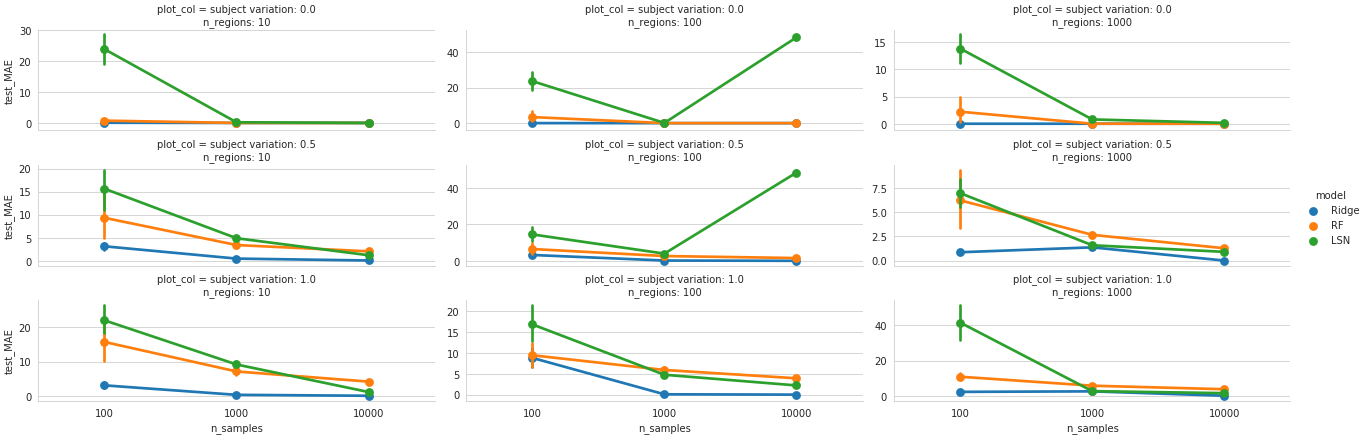

In [60]:
plot_df = perf_df.copy()

traj_func = "poly"
roi_variation = "init_shift"
followup_interval = 2
data_aug = False

plot_df = plot_df[(plot_df["traj_func"]==traj_func) & (plot_df["roi_variation"]==roi_variation) & (plot_df["data_aug"] == data_aug)] 
plot_df = plot_df[(plot_df["followup_interval"]==followup_interval)]

if followup_interval > 0:
    plot_df["test_MAE"] = 0.5 * (plot_df["test_MAE1"] + plot_df["test_MAE1"])
    plot_df["test_r"] = 0.5 * (plot_df["test_r1"] +plot_df["test_r1"])
else:
    plot_df["test_MAE"] = plot_df["test_MAE1"]
    plot_df["test_r"] = plot_df["test_r1"] 

plot_df["plot_col"] = "subject variation: " + plot_df["subject_variation"].astype(str) + "\nn_regions: " + plot_df["n_regions"].astype(str)

with sns.axes_style("whitegrid"):
    g = sns.catplot(y="test_MAE",x="n_samples",hue="model",col="plot_col", col_wrap=3, height=2, aspect=3, kind="point", 
                    sharey=False, data=plot_df)

## Generate run configs:

In [61]:
traj_func_list = ["exp", "poly"]
roi_variation_list = ["init_shift", "time_shift"]
subject_variation_list = [0, 0.5, 1]
followup_list = [0, 2, 10]
data_aug_list = [False, True]

config_df = pd.DataFrame(columns=["traj_func","roi_variation","subject_variation","followup_interval","data_aug"])

i = 0
for traj_func in traj_func_list:
    for roi_variation in roi_variation_list:
        for subject_variation in subject_variation_list:
            for followup_interval in followup_list:
                if followup_interval > 0: 
                    for data_aug in data_aug_list:        
                        config_df.loc[i] = [traj_func, roi_variation, subject_variation, followup_interval, data_aug]
                        i += 1
                else:
                    data_aug = False
                    config_df.loc[i] = [traj_func, roi_variation, subject_variation, followup_interval, data_aug]
                    i += 1


print(f"n_configs: {len(config_df)}")
config_df.head()

n_configs: 60


,traj_func,roi_variation,subject_variation,followup_interval,data_aug
0,exp,init_shift,0,0,False
1,exp,init_shift,0,2,False
2,exp,init_shift,0,2,True
3,exp,init_shift,0,10,False
4,exp,init_shift,0,10,True


In [62]:
## Save config file
# config_df.to_csv("./results/simulation/configs/config_run_6.csv")